In [1]:
!pip install prophet

In [10]:
# Python
import pandas as pd
from prophet import Prophet


In [42]:
# Python
df = pd.read_csv('../data/crypto.csv',names=["date", "open", "high", "low", "close", "volume", "ticker"])
df.head()

,date,open,high,low,close,volume,ticker
0,2022-10-30,20749.98,20749.98,20676.4,20676.4,2.770231e+10,BTC/USD
1,2022-10-26,20105.00,20170.00,20077.0,20143.0,5.776770e+05,BTC/USD
2,2022-10-25,19339.00,20432.00,19251.0,20104.0,5.544651e+07,BTC/USD
3,2022-10-24,19586.00,19615.00,19174.0,19340.0,2.537289e+07,BTC/USD
4,2022-10-23,19219.00,19707.00,19086.0,19585.0,2.971904e+07,BTC/USD


In [52]:
prophet_df=pd.DataFrame()
newdf=df[df['ticker']=="BTC/USD"]
prophet_df[["ds","y"]] = newdf[["date","close"]]


In [53]:
m = Prophet()
m.fit(prophet_df)

19:09:28 - cmdstanpy - INFO - Chain [1] start processing
19:09:30 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
2843,2022-11-25
2844,2022-11-26
2845,2022-11-27
2846,2022-11-28
2847,2022-11-29


In [55]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2818,2022-10-31,25828.263401,20481.877319,31463.231283
2819,2022-11-01,25777.699136,20165.598606,31038.185429
2820,2022-11-02,25773.486311,20386.503564,30764.398690
2821,2022-11-03,25692.095066,20282.594726,30948.246714
2822,2022-11-04,25642.833833,20297.691622,30811.023187
2823,2022-11-05,25600.537746,20065.518898,31060.401595
2824,2022-11-06,25514.923678,20031.384947,30815.787564
2825,2022-11-07,25480.742837,20079.339115,31007.605468
2826,2022-11-08,25384.219712,19925.065275,30774.868368
2827,2022-11-09,25338.316123,19544.525629,30855.311283


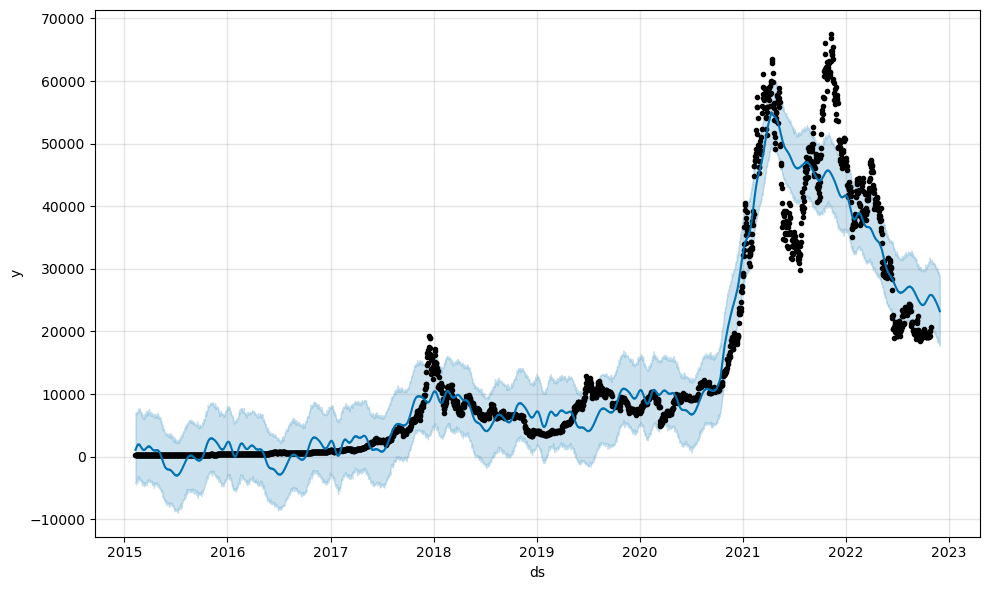

In [56]:
# Python
fig1 = m.plot(forecast)


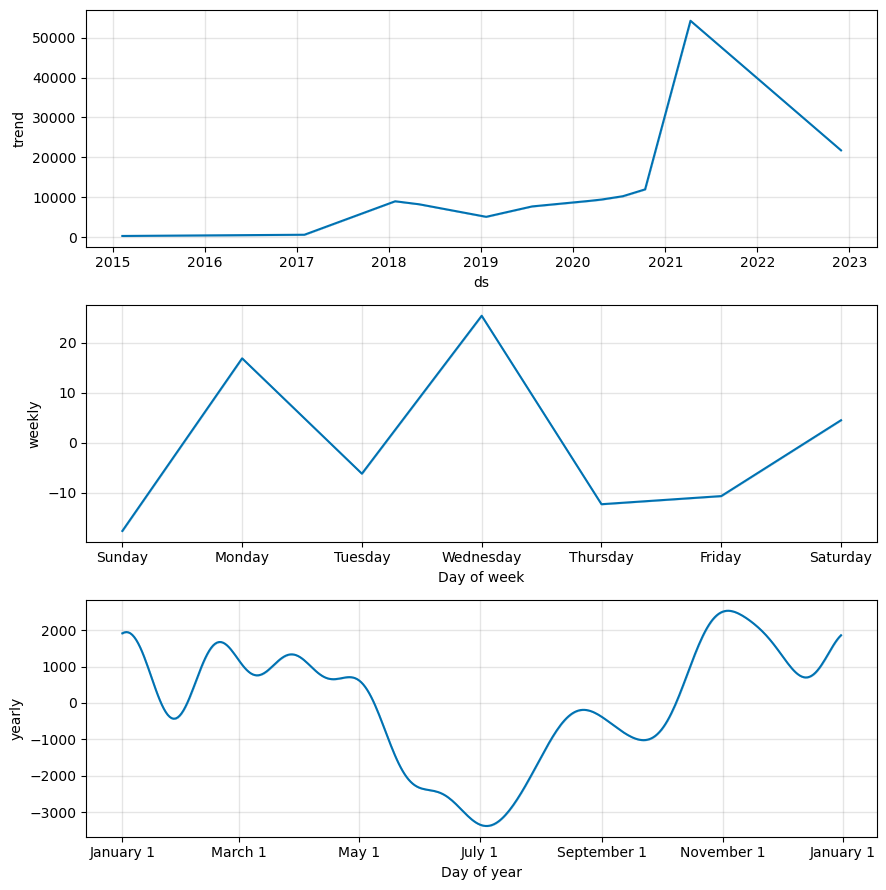

In [57]:
# Python
fig2 = m.plot_components(forecast)


In [58]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)